In [36]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.chdir('/Users/crystal.butler/Documents/Code_Projects/MiFace/Python/data/Distance_Output/MiFace_2.1-0003')
os.getcwd()


'/Users/crystal.butler/Documents/Code_Projects/MiFace/Python/data/Distance_Output/MiFace_2.1-0003'

In [3]:
# Read in all-pairs similarity scores.
pairs_scores = pd.read_csv('Score_Lists/0003.pairs.txt_scores.txt', header=None)
# Read in the list of scored words.
labels = pd.read_csv('Label_Lists/0003.pairs.txt_labels.txt', header=None)

In [5]:
print(type(pairs_scores))
print(type(labels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [37]:
pairs_scores.head()

,0
0,0.329435
1,0.264609
2,0.253338
3,0.158340
4,0.100460


In [40]:
labels.head()

,0
0,serious
1,emotional
2,apprehensive
3,pensive
4,indifferent


In [6]:
# Transform similarity (proximity) scores to distances.
pairs_distances = 1 - pairs_scores
pairs_distances.head()

,0
0,0.670565
1,0.735391
2,0.746662
3,0.841660
4,0.899540


In [43]:
distances_array = np.array(pairs_distances)
distances_matrix = ssd.squareform(distances_array, force='tomatrix')
labels_array = np.array(labels)
distances_array[0:3]

ValueError: Forcing 'tomatrix' but input X is not a distance vector.

In [17]:
print(type(distances_array))
print(distances_array.shape)
print(type(labels_array))
print(labels_array.shape)

<class 'numpy.ndarray'>
(780, 1)
<class 'numpy.ndarray'>
(40, 1)


In [27]:
lnk = sch.linkage(distances_array, 'average')
print(lnk.shape)

(779, 4)


[[2], [8], [0], [4], [1], [9], [9], [0], [3], [6]]
[[ 5.          6.          0.          2.        ]
 [ 2.          7.          0.          2.        ]
 [ 0.          4.          1.          2.        ]
 [ 1.         10.          1.          3.        ]
 [ 3.          8.          1.          2.        ]
 [11.         12.          1.5         4.        ]
 [ 9.         14.          2.5         3.        ]
 [15.         16.          3.58333333  7.        ]
 [13.         17.          6.38095238 10.        ]]


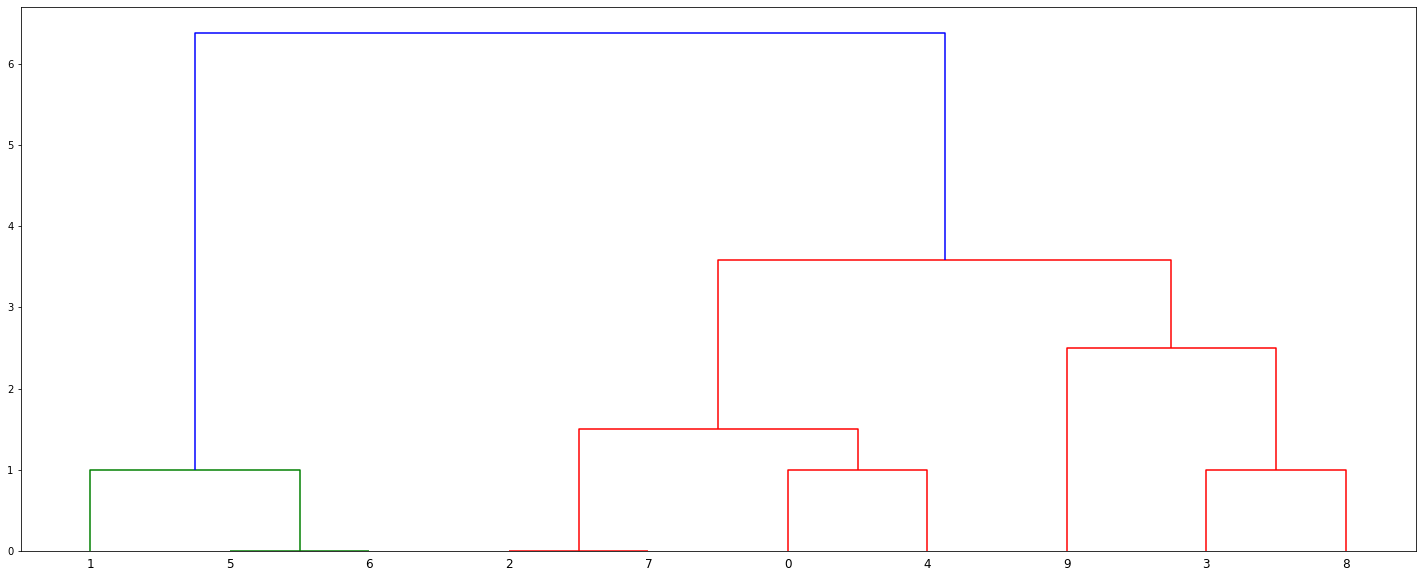

In [32]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0, 3, 6]]
print(X)
Z = sch.linkage(X, 'average')
print(Z)
fig = plt.figure(figsize=(25, 10))
dn = sch.dendrogram(Z)
plt.show()

IndexError: index -522 is out of bounds for axis 0 with size 40

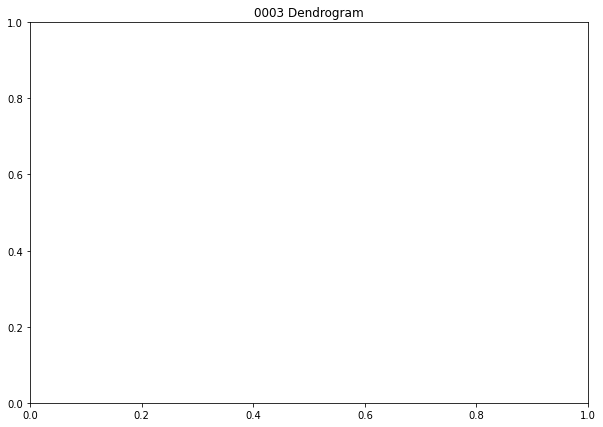

In [22]:
plt.figure(figsize=(25, 10))
plt.title("0003 Dendrogram")
dend = sch.dendrogram(lnk, labels=labels_array)
plt.show()